[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jfcrenshaw/pzflow/blob/main/docs/tutorials/conditional_demo.ipynb)
[![Open on Github](https://img.shields.io/badge/github-Open%20on%20Github-black?logo=github)](https://colab.research.google.com/github/jfcrenshaw/pzflow/blob/main/docs/tutorials/conditional_demo.ipynb)

If running in Colab, to switch to GPU, go to the menu and select Runtime -> Change runtime type -> Hardware accelerator -> GPU.

In addition, uncomment and run the following code:

In [1]:
# !pip install pzflow matplotlib

-------------------
## Conditional flow example

This notebook uses the same data as the introduction, but this time, instead of modeling the full joint probability distribution, we will model the distribution of `x` conditioned on the value of `y`.

In math, instead of modeling $p(x, y)$, we will model $p(x|y)$.

Note that this just a basic 1-dimensional example, but it is also possible to condition a high-dimesional distribution on multiple variables. For example, you might build the 7-dimensional flow from the [redshift example](https://github.com/jfcrenshaw/pzflow/blob/main/examples/redshift_example.ipynb), but condition the flow on right ascension and declination.

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from pzflow import Flow
from pzflow.examples import get_twomoons_data

First let's load the two moons data set again:

In [2]:
data = get_twomoons_data()
data

,x,y
0,-0.748695,0.777733
1,1.690101,-0.207291
2,2.008558,0.285932
3,1.291547,-0.441167
4,0.808686,-0.481017
...,...,...
99995,1.642738,-0.221286
99996,0.981221,0.327815
99997,0.990856,0.182546
99998,-0.343144,0.877573


We can build the conditional flow in the same way we built the regular flow in the intro.
All we have to do is provide the name of the column the distribution is conditioned on.

In [3]:
flow = Flow(data_columns=["x"], conditional_columns=["y"])

Now we are ready to train the flow:

In [4]:
losses = flow.train(data, verbose=True)

Training 100 epochs 
Loss:
(0) 1.4365
(1) 0.1589
(6) -0.1398
(11) -0.1478
(16) -0.1447
(21) -0.1649
(26) -0.1784
(31) -0.1631
(36) -0.1793
(41) -0.1570
(46) -0.1478
(51) -0.1729
(56) -0.1537
(61) -0.1768
(66) -0.1641
(71) -0.1798
(76) -0.1568
(81) -0.1651
(86) -0.1396
(91) -0.1830
(96) -0.1805
(100) -0.1686


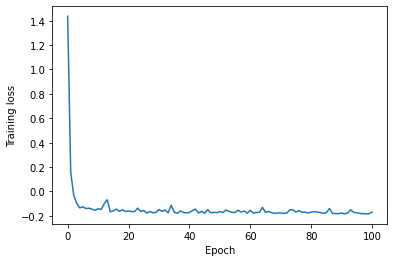

In [5]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()

Great!

You can use this flow very similarly to how we used the regular flow.
We can sample and calculate posteriors -- the big difference is that we now provide conditions to condition the distribution on. 

So for example, we can condition the distribution on the first value in our DataFrame, and draw 1000 samples:

In [6]:
samples = flow.sample(1000, conditions=data[:1], seed=0)
samples

,x,y
0,-0.706093,0.777733
0,-0.602977,0.777733
0,-0.532370,0.777733
0,-0.615776,0.777733
0,0.616342,0.777733
...,...,...
0,0.592016,0.777733
0,-0.556290,0.777733
0,-0.581105,0.777733
0,-0.607906,0.777733


Notice how the `y` value is the same for all of these samples? That is because all of these samples were conditioned on the same `y` value!

Let's plot the histogram of these samples, along with the posterior for this y value:

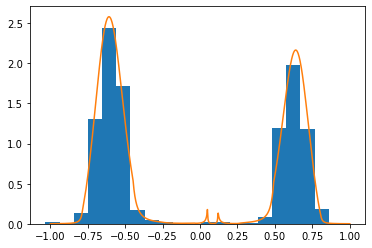

In [7]:
plt.hist(samples.x, bins=20, density=True)

x_grid = jnp.linspace(-1, 1, 1000)
x_posterior = flow.posterior(data[:1], column="x", grid=x_grid)[0]
plt.plot(x_grid, x_posterior)


You can see they match well. There is a small bump between the two peaks - it's not clear if it's real or not. Depending on the context, you may want to validate or regularize this bump.

We can also easily draw multiple samples from multiple conditions.
For example, if we take the first 10 rows of `data` and set `nsamples=10`, we will get 100 samples - 10 for each condition in `data`:

In [8]:
flow.sample(nsamples=10, conditions=data[:10])

,x,y
0,-0.525071,0.777733
0,0.714533,0.777733
0,0.540538,0.777733
0,0.731488,0.777733
0,-0.708670,0.777733
...,...,...
9,0.623353,0.756692
9,-0.748991,0.756692
9,-0.640262,0.756692
9,-0.590335,0.756692
